### Importing all required libraries for Project

In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

# change inline to auto if you have Spyder installed
%matplotlib inline

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Libraries imported.


### Reading Wikipedia link and adding data into Dataframe

In [2]:
wiki = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [3]:
wiki_list = pd.read_html(wiki)

In [4]:
df = wiki_list[0]

In [5]:
df.shape

(290, 3)

In [6]:
df.head(10)

,0,1,2
0,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights
8,M6A,North York,Lawrence Manor
9,M7A,Queen's Park,Not assigned


In [7]:
df = df[1:]

In [8]:
df.columns = ['Postcodes','Borough','Neighborhood']

### Data clean up and trasformations for required format

In [9]:
toronto_df = df [df ['Borough'] != 'Not assigned']

In [10]:
toronto_df 

,Postcodes,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights
8,M6A,North York,Lawrence Manor
9,M7A,Queen's Park,Not assigned
11,M9A,Etobicoke,Islington Avenue
12,M1B,Scarborough,Rouge
13,M1B,Scarborough,Malvern


If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [11]:
toronto_df['Neighborhood'] = toronto_df.apply(
    lambda row: row['Borough'] if row['Neighborhood'] == 'Not assigned' else row['Neighborhood'],axis = 1)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
toronto_df

,Postcodes,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights
8,M6A,North York,Lawrence Manor
9,M7A,Queen's Park,Queen's Park
11,M9A,Etobicoke,Islington Avenue
12,M1B,Scarborough,Rouge
13,M1B,Scarborough,Malvern


For Rows which have More than one neighborhood in one postal code area will be combined into one row with the neighborhoods separated with a comma.

In [13]:
toronto_df_final = toronto_df.groupby(['Postcodes','Borough']).Neighborhood.agg([('Neighborhood', ', '.join)]).reset_index()

Shape and view of final dataframe

In [14]:
toronto_df_final.shape

(103, 3)

In [15]:
toronto_df_final

,Postcodes,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Imported csv file for latitude and longtude

In [16]:

import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_5b335a8674f940eda2a51e5945b2b0ba = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vEGXVggxwqhuinJKFRWYbwSP3Hsim0xycgN7m2HspuI9',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_5b335a8674f940eda2a51e5945b2b0ba.get_object(Bucket='ds-donotdelete-pr-dlh8zp9ux5casv',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.columns = ['Postcodes','Latitude','Longitude']
df_data_1.head()


,Postcodes,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [18]:
df_final = pd.merge(toronto_df_final, df_data_1, on='Postcodes')

### Final Data with zip code , Lat and Long

In [19]:
df_final

,Postcodes,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### Calling Foursquare API to get all The Gym counts around each post code

In [20]:
CLIENT_ID = 'EKWRXD1IYYLNISWO1JEAOHCPQKUTQJHTWV0EJIXVB3XVYLLN' # your Foursquare ID
CLIENT_SECRET = 'IKNOYD4RYJVOEM3QEME31GEZ5HG0D1ARN2IFJEKTAR44QE4Z' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 1000
radius= 1000
search_query = ''
categoryId = '4bf58dd8d48988d175941735'

In [21]:
df_gym_count = pd.DataFrame({'Postcodes': [], 'Gym_count': []})

In [22]:
df_gym_count.shape

(0, 2)

In [23]:
for index, row in df_final.iterrows():
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT,categoryId)
    results = requests.get(url).json()
    result_str = str(results)
    X = result_str.count("Address")
    df_gym_count = df_gym_count.append({'Postcodes': row["Postcodes"], 'Gym_count': X}, ignore_index=True)

### Gym counts by address by post codes

In [24]:
df_gym_count

,Gym_count,Postcodes
0,5.0,M1B
1,1.0,M1C
2,0.0,M1E
3,0.0,M1G
4,12.0,M1H
5,3.0,M1J
6,2.0,M1K
7,5.0,M1L
8,3.0,M1M
9,4.0,M1N


In [25]:
df_final = pd.merge(df_final, df_gym_count, on='Postcodes')

In [26]:
df_final

,Postcodes,Borough,Neighborhood,Latitude,Longitude,Gym_count
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,5.0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,12.0
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,3.0
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,2.0
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,5.0
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3.0
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,4.0


### Getting population Data 

In [27]:

body = client_5b335a8674f940eda2a51e5945b2b0ba.get_object(Bucket='ds-donotdelete-pr-dlh8zp9ux5casv',Key='Canada_pop.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.columns = ['Postcodes','Population']

In [28]:
df_data_3.head()

,Postcodes,Population
0,Canada,33476688
1,A0A,46297
2,A0B,20985
3,A0C,12834
4,A0E,23384


In [29]:
df_toronto = df_final.set_index('Postcodes').join(df_data_3.set_index('Postcodes'))

In [30]:
df_toronto

,Borough,Neighborhood,Latitude,Longitude,Gym_count,Population
Postcodes,,,,,,
M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,5.0,67251.0
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0,35601.0
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,46398.0
M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,30243.0
M1H,Scarborough,Cedarbrae,43.773136,-79.239476,12.0,23706.0
M1J,Scarborough,Scarborough Village,43.744734,-79.239476,3.0,36163.0
M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,2.0,47286.0
M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,5.0,32981.0
M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3.0,22919.0


### Plotting all the data points by population and Gym counts for each postcodes

In [31]:
# Set the size of the plot
plt.figure(figsize=(14,7))

Text(0.5,1,'Data_Plot')

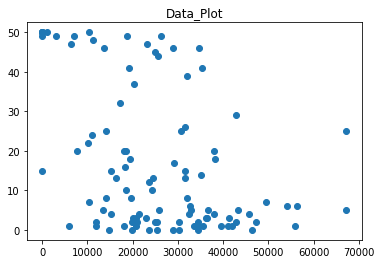

In [32]:
plt.scatter(df_toronto.Population, df_toronto.Gym_count)
plt.title('Data_Plot')

### Data cleanups for population data

In [33]:
df_toronto_KM = df_toronto[['Gym_count','Population']]
df_toronto_KM = df_toronto_KM.dropna()

In [37]:
df_toronto_KM .Population = df_toronto_KM.Population/1000

In [38]:
df_toronto_KM.head()

,Gym_count,Population
Postcodes,,
M1B,5.0,0.067251
M1C,1.0,0.035601
M1E,0.0,0.046398
M1G,0.0,0.030243
M1H,12.0,0.023706


### Clustering all data points by Population vs Gym count using k-Means

In [39]:
km = KMeans(n_clusters=5).fit(df_toronto_KM)

In [40]:
labels = km.predict(df_toronto_KM)
centroids = km.cluster_centers_

### Labels and centroids for 5 clusters

In [41]:
labels


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 4, 4, 2, 4, 2, 3, 0, 1,
       4, 3, 4, 1, 4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 4,
       3, 3, 2, 2, 2, 0, 1, 4, 3, 1, 0, 0, 0, 4, 4, 2, 3, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [42]:
centroids

array([[  2.58000000e+00,   3.14761200e-02],
       [  3.80000000e+01,   2.48476000e-02],
       [  1.24666667e+01,   2.22870667e-02],
       [  4.81052632e+01,   1.23832632e-02],
       [  2.24615385e+01,   2.67257692e-02]])

In [43]:
cluster_map = pd.DataFrame()
cluster_map['Postcodes']=df_toronto_KM.index.values
cluster_map['Cluster']  = km.labels_

In [44]:
cluster_map

,Postcodes,Cluster
0,M1B,0
1,M1C,0
2,M1E,0
3,M1G,0
4,M1H,2
5,M1J,0
6,M1K,0
7,M1L,0
8,M1M,0
9,M1N,0


In [45]:
df_toronto_map = df_toronto.join(cluster_map.set_index('Postcodes'))

In [46]:
df_toronto_map.head(10)

,Borough,Neighborhood,Latitude,Longitude,Gym_count,Population,Cluster
Postcodes,,,,,,,
M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,5.0,67251.0,0.0
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0,35601.0,0.0
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,46398.0,0.0
M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,30243.0,0.0
M1H,Scarborough,Cedarbrae,43.773136,-79.239476,12.0,23706.0,2.0
M1J,Scarborough,Scarborough Village,43.744734,-79.239476,3.0,36163.0,0.0
M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,2.0,47286.0,0.0
M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,5.0,32981.0,0.0
M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3.0,22919.0,0.0


In [47]:
conditions = [
    (df_toronto_map['Cluster'] == 0.0),
    (df_toronto_map['Cluster'] == 1.0),
    (df_toronto_map['Cluster'] == 2.0),
    (df_toronto_map['Cluster'] == 3.0),
    (df_toronto_map['Cluster'] == 4.0)]
choices = ['yellow', 'blue', 'purple','red','black']
df_toronto_map['color'] = np.select(conditions, choices, default='black')


In [48]:
df_toronto_map

,Borough,Neighborhood,Latitude,Longitude,Gym_count,Population,Cluster,color
Postcodes,,,,,,,,
M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,5.0,67251.0,0.0,yellow
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1.0,35601.0,0.0,yellow
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,46398.0,0.0,yellow
M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,30243.0,0.0,yellow
M1H,Scarborough,Cedarbrae,43.773136,-79.239476,12.0,23706.0,2.0,purple
M1J,Scarborough,Scarborough Village,43.744734,-79.239476,3.0,36163.0,0.0,yellow
M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,2.0,47286.0,0.0,yellow
M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,5.0,32981.0,0.0,yellow
M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,3.0,22919.0,0.0,yellow


In [49]:
df_red = df_toronto_map.loc[df_toronto_map['color'] == 'red']
df_yellow = df_toronto_map.loc[df_toronto_map['color'] == 'yellow']
df_blue = df_toronto_map.loc[df_toronto_map['color'] == 'blue']
df_black = df_toronto_map.loc[df_toronto_map['color'] == 'black']
df_purple = df_toronto_map.loc[df_toronto_map['color'] == 'purple']

###  Plotting scatter plot for all segment color coded

Text(0.5,1,'K Mean Classification')

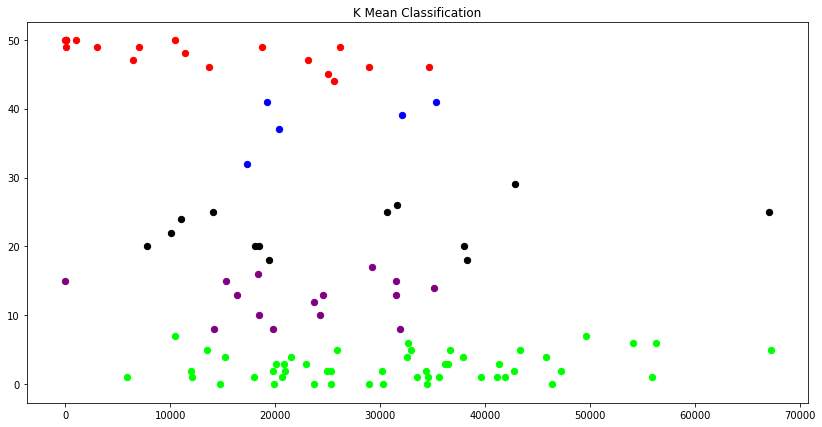

In [56]:
plt.figure(figsize=(14,7))

# Plot the Models Classifications
plt.scatter(df_red.Population, df_red.Gym_count, c='red', s=40)
plt.scatter(df_blue.Population, df_blue.Gym_count, c='blue', s=40)
plt.scatter(df_yellow.Population, df_yellow.Gym_count, c='lime', s=40)
plt.scatter(df_black.Population, df_black.Gym_count, c='black', s=40)
plt.scatter(df_purple.Population, df_purple.Gym_count, c='purple', s=40)
plt.title('K Mean Classification')

### Final MAP of Toronto for points in each segment color coded

In [54]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.654260, -79.360636], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighborhood,color in zip(df_red['Latitude'], df_red['Longitude'], df_red['Borough'], df_red['Neighborhood'], df_red['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_toronto)  

for lat, lng, borough, neighborhood,color in zip(df_blue['Latitude'], df_blue['Longitude'], df_blue['Borough'], df_blue['Neighborhood'], df_blue['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill_color='blue',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_toronto)

for lat, lng, borough, neighborhood,color in zip(df_black['Latitude'], df_black['Longitude'], df_black['Borough'], df_black['Neighborhood'], df_black['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='black',
        fill_color='black',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_toronto)

for lat, lng, borough, neighborhood,color in zip(df_yellow['Latitude'], df_yellow['Longitude'], df_yellow['Borough'], df_yellow['Neighborhood'], df_yellow['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='lime',
        fill_color='lime',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_toronto)

for lat, lng, borough, neighborhood,color in zip(df_purple['Latitude'], df_purple['Longitude'], df_purple['Borough'], df_purple['Neighborhood'], df_purple['color']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='purple',
        fill_color='purple',
        fill=True,
        fill_opacity=.5,
        parse_html=False).add_to(map_toronto)


    
map_toronto